In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Bologna_Italia_Correcto.csv')
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  4668 non-null   object 
 1   source                                        4668 non-null   object 
 2   host_since                                    4668 non-null   object 
 3   host_response_time                            4668 non-null   object 
 4   host_response_rate                            4668 non-null   float64
 5   host_acceptance_rate                          4668 non-null   float64
 6   host_is_superhost                             4668 non-null   object 
 7   host_has_profile_pic                          4668 non-null   object 
 8   host_identity_verified                        4668 non-null   object 
 9   neighbourhood_cleansed                        4668 non-null   o

In [64]:
#Elijo los 4 tipos de cuarto
df['room_type'].value_counts()

room_type
Entire home/apt    3646
Private room       1010
Hotel room            6
Shared room           6
Name: count, dtype: int64

In [67]:
#Creamos en frecuencias para futuro uso
room_freq = df['room_type'].value_counts()
print("\nFrecuencias de room_type:")
print(room_freq)
room_type_map = {
    'Entire home/apt': 4,  # Más común
    'Private room': 3,
    'Hotel room': 2,
    'Shared room': 1       # Menos común
}

df['room_type_encoded'] = df['room_type'].map(room_type_map)

print("\nRoom_type convertido:")
print(df[['room_type', 'room_type_encoded']].drop_duplicates().sort_values('room_type_encoded'))

# Convertir a 1/0 (True/False)
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

# Verificar
print("\nDistribución de host_is_superhost:")
print(df['host_is_superhost'].value_counts())


Frecuencias de room_type:
room_type
Entire home/apt    3646
Private room       1010
Hotel room            6
Shared room           6
Name: count, dtype: int64

Room_type convertido:
           room_type  room_type_encoded
865      Shared room                  1
64        Hotel room                  2
0       Private room                  3
2    Entire home/apt                  4

Distribución de host_is_superhost:
host_is_superhost
0    2928
1    1740
Name: count, dtype: int64


In [54]:
#Filtro por tipo de cuarto y mantengo columnas numéricas
entire_home_apt = df[df['room_type']=='Entire home/apt']
private_room = df[df['room_type']=='Private room']
hotel_room = df[df['room_type']=='Hotel room']
shared_room = df[df['room_type']=='Shared room']

dataframes = [entire_home_apt, private_room, hotel_room, shared_room]
entire_home_apt, private_room, hotel_room, shared_room = [
    df.select_dtypes(include=['float64', 'int64', 'float', 'int']) 
    for df in dataframes
]

In [55]:
#Creo una función para hacer los heatmaps
def crear_heatmap(df,title):
    sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True,fmt='.2f')
    plt.title(title)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


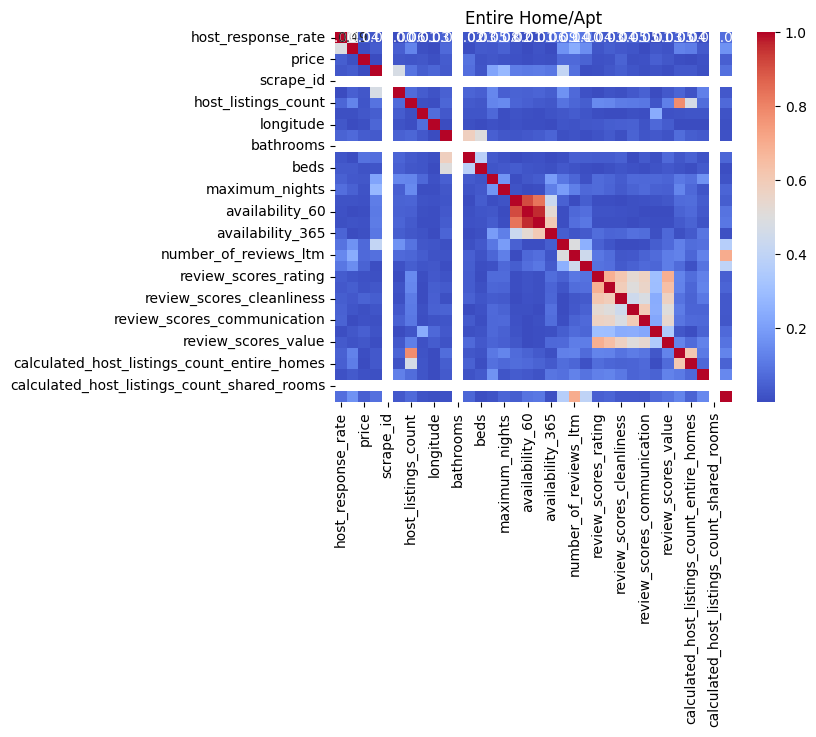

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


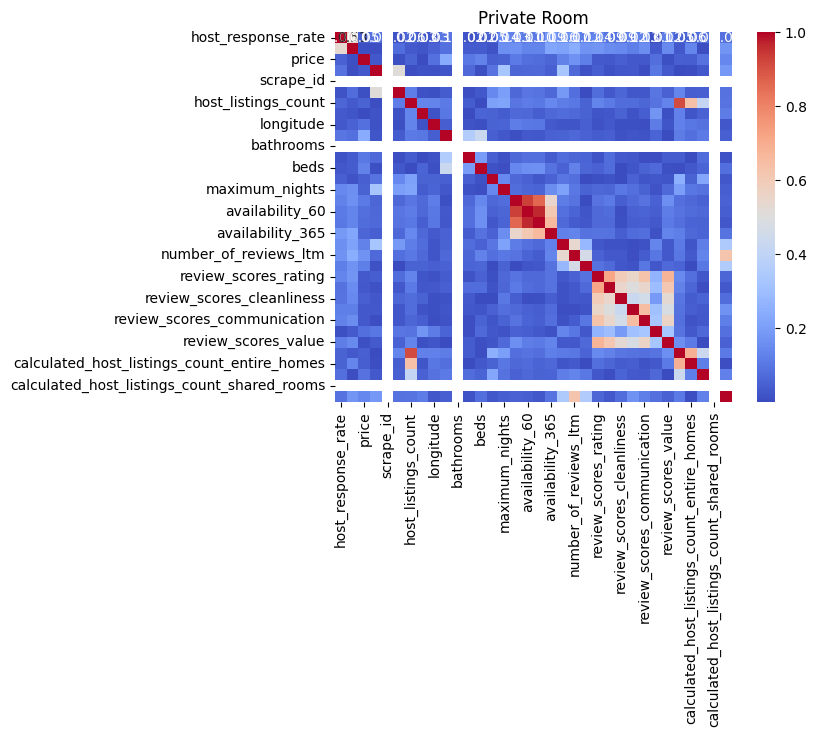

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


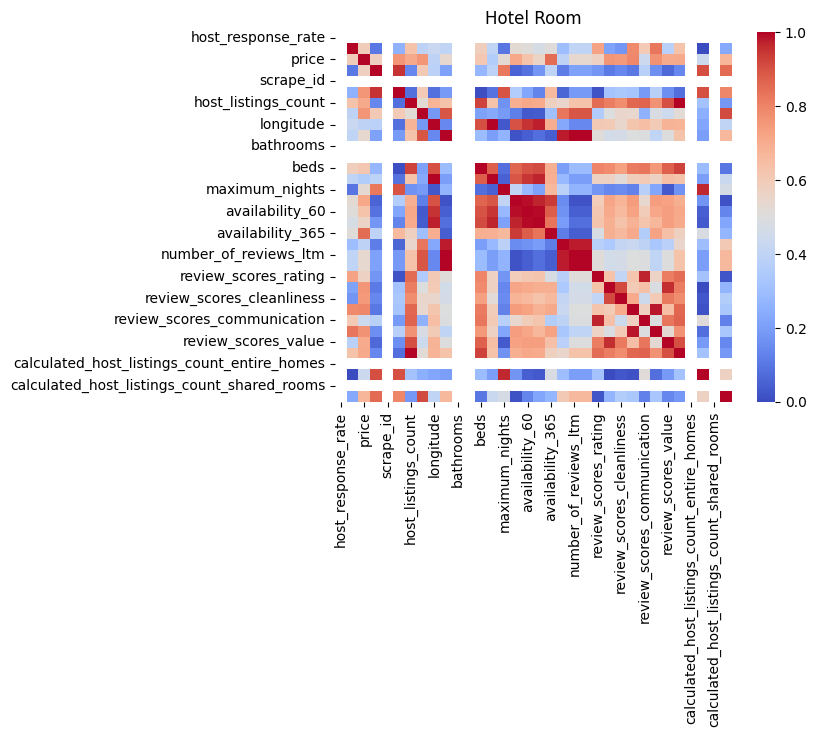

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


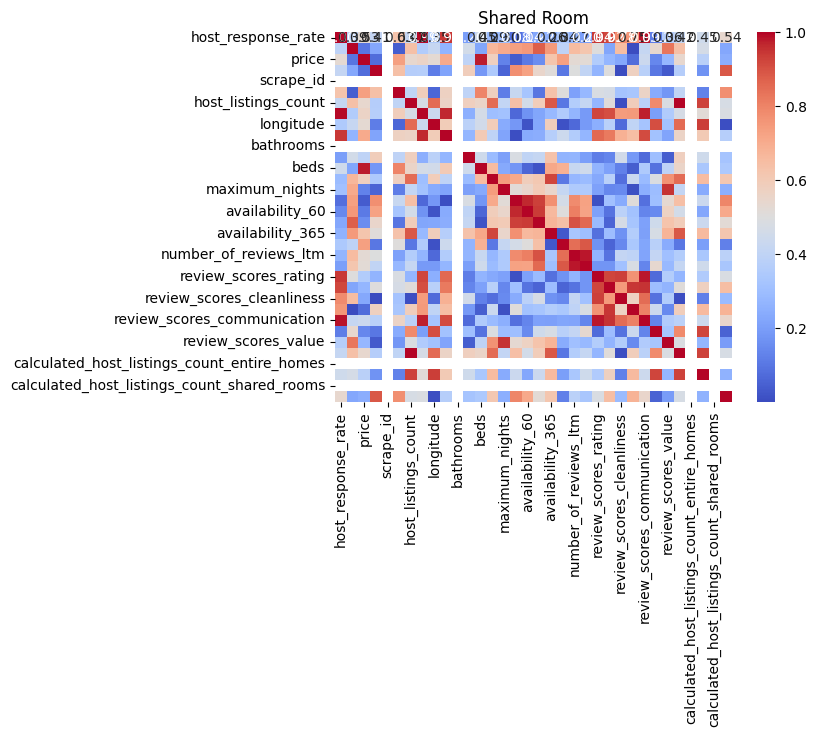

In [56]:
crear_heatmap(entire_home_apt, 'Entire Home/Apt')
crear_heatmap(private_room, 'Private Room')
crear_heatmap(hotel_room, 'Hotel Room')
crear_heatmap(shared_room, 'Shared Room')

In [58]:
#Pares de variables a analizar
analizar = [
    ('host_acceptance_rate', 'host_response_rate'),
    ('review_scores_location', 'review_scores_cleanliness'),
    ('host_acceptance_rate', 'price'),
    ('availability_365', 'number_of_reviews'),
    ('host_acceptance_rate', 'number_of_reviews'),
    ('reviews_per_month', 'review_scores_communication')
]

#Creo esta función para mostrar las correlaciones
def mostrar_correlaciones(df, nombre):
    print(f'\nCORRELACIONES PARA: {nombre}\n')
    for var1,var2 in analizar:
        if var1 in df.columns and var2 in df.columns:
            corr = abs(df[[var1, var2]].corr().iloc[0, 1])
            print(f'{var1} vs {var2}: {corr:.3f}')
        else:
            print(f'[!] {var1} o {var2} no encontradas en {nombre}')

mostrar_correlaciones(entire_home_apt, 'Entire Home/Apt')
mostrar_correlaciones(private_room, 'Private Room')
mostrar_correlaciones(hotel_room, 'Hotel Room')
mostrar_correlaciones(shared_room, 'Shared Room')


CORRELACIONES PARA: Entire Home/Apt

host_acceptance_rate vs host_response_rate: 0.491
review_scores_location vs review_scores_cleanliness: 0.239
host_acceptance_rate vs price: 0.011
availability_365 vs number_of_reviews: 0.040
host_acceptance_rate vs number_of_reviews: 0.165
reviews_per_month vs review_scores_communication: 0.024

CORRELACIONES PARA: Private Room

host_acceptance_rate vs host_response_rate: 0.533
review_scores_location vs review_scores_cleanliness: 0.191
host_acceptance_rate vs price: 0.008
availability_365 vs number_of_reviews: 0.122
host_acceptance_rate vs number_of_reviews: 0.208
reviews_per_month vs review_scores_communication: 0.119

CORRELACIONES PARA: Hotel Room

host_acceptance_rate vs host_response_rate: nan
review_scores_location vs review_scores_cleanliness: 0.604
host_acceptance_rate vs price: 0.596
availability_365 vs number_of_reviews: 0.117
host_acceptance_rate vs number_of_reviews: 0.299
reviews_per_month vs review_scores_communication: 0.123

CORRELA

**HALLAZGOS**

Los resultados muestran patrones interesantes en las relaciones entre variables clave. Para los alojamientos Entire Home/Apt y Private Room, se mantiene una correlación moderada (0.49-0.53) entre la tasa de aceptación y la tasa de respuesta de los hosts, confirmando que los anfitriones más receptivos tienden a aceptar más reservas. Sin embargo, en Hotel Room, esta relación no pudo calcularse (NaN), lo que sugiere posibles limitaciones en los datos disponibles para este segmento.

En cuanto a las calificaciones, Hotel Room destaca nuevamente con una correlación notable (0.60) entre las puntuaciones de ubicación y limpieza, indicando una fuerte asociación entre estos factores. Por el contrario, en Shared Room, esta relación es casi inexistente (0.09), lo que podría reflejar estándares de limpieza menos vinculados a la ubicación en este tipo de alojamiento.

Un hallazgo relevante es la correlación positiva (0.60) entre la tasa de aceptación y el precio en Hotel Room, lo que sugiere que los hosts que cobran tarifas más altas también tienden a aceptar más reservas, posiblemente debido a una mayor profesionalización en este segmento. En los demás tipos de alojamiento, esta relación es cercana a cero, mostrando poca influencia del precio en las decisiones de aceptación.

Respecto a la disponibilidad y las reseñas, Private Room muestra una correlación positiva (0.12) entre la disponibilidad anual y el número de reseñas, lo que podría indicar que una mayor disponibilidad se asocia con más interacciones de huéspedes. En Shared Room, esta relación es aún más fuerte (0.55) entre las reseñas mensuales y la puntuación de comunicación, sugiriendo que los anfitriones con más reseñas mantienen mejores estándares de comunicación.

In [59]:
#Definimos las relaciones (dependiente, independiente) en tuplas
relaciones = [
    ('host_acceptance_rate', ['host_response_rate']),
    ('review_scores_cleanliness', ['review_scores_location']),
    ('host_acceptance_rate', ['price']),
    ('number_of_reviews', ['availability_365']),
    ('number_of_reviews', ['host_acceptance_rate']),
    ('review_scores_communication', ['reviews_per_month'])
]

#Lista de DataFrames con sus nombres
dataframes = {
    'Entire Home/Apt': entire_home_apt,
    'Private Room': private_room,
    'Hotel Room': hotel_room,
    'Shared Room': shared_room
}

In [60]:
from sklearn.linear_model import LinearRegression
#Aplicaremos metodo visto en clase
#Creo esta función para realizar la regresión y mostrar resultados
def analizar_regresion(df, nombre_df):
    print(f"\n\nANÁLISIS DE REGRESIÓN: {nombre_df}")
    
    for dep_var, indep_vars in relaciones:
        if all(var in df.columns for var in [dep_var] + indep_vars):
            #Preparar variables
            X = df[indep_vars]
            y = df[dep_var]
            
            model = LinearRegression()
            model.fit(X, y)
            
            coef_Deter = model.score(X, y)
            coef_Correl = np.sqrt(coef_Deter)
            
            # Mostrar resultados
            print(f"\nModelo: {dep_var} vs {' + '.join(indep_vars)}")
            print(f"Intercepto: {model.intercept_:.4f}")
            print(f"Coef. Determinación (R cuadrada): {coef_Deter:.4f}")
            print(f"Coef. Correlación (R): {coef_Correl:.4f}")


#Aplicar a los 4
for nombre, df in dataframes.items():
    analizar_regresion(df, nombre)



ANÁLISIS DE REGRESIÓN: Entire Home/Apt

Modelo: host_acceptance_rate vs host_response_rate
Intercepto: 0.1962
Coef. Determinación (R cuadrada): 0.2407
Coef. Correlación (R): 0.4906

Modelo: review_scores_cleanliness vs review_scores_location
Intercepto: 3.8000
Coef. Determinación (R cuadrada): 0.0571
Coef. Correlación (R): 0.2391

Modelo: host_acceptance_rate vs price
Intercepto: 0.9145
Coef. Determinación (R cuadrada): 0.0001
Coef. Correlación (R): 0.0113

Modelo: number_of_reviews vs availability_365
Intercepto: 35.8446
Coef. Determinación (R cuadrada): 0.0016
Coef. Correlación (R): 0.0405

Modelo: number_of_reviews vs host_acceptance_rate
Intercepto: 7.7002
Coef. Determinación (R cuadrada): 0.0274
Coef. Correlación (R): 0.1654

Modelo: review_scores_communication vs reviews_per_month
Intercepto: 4.8897
Coef. Determinación (R cuadrada): 0.0006
Coef. Correlación (R): 0.0236


ANÁLISIS DE REGRESIÓN: Private Room

Modelo: host_acceptance_rate vs host_response_rate
Intercepto: 0.0540
C

Entire Home/Apt
Mayor correlación (R = 0.4906):
y=0.1962+0.7354x
(y: host_acceptance_rate, x: host_response_rate)

Private Room
Mayor correlación (R = 0.5327):
y=0.0540+0.8501x
(y: host_acceptance_rate, x: host_response_rate)

Hotel Room
Mayor correlación (R = 0.6038):
y=1.8996+0.7201x
(y: review_scores_cleanliness, x: review_scores_location)

Shared Room
Mayor correlación (R = 0.5472):
y=5.0094+0.1503x
(y: review_scores_communication, x: reviews_per_month)

**Tabla de los 10 Coeficientes Más Altos:**

| Tipo de Alojamiento   | Modelo (Dependiente ~ Independiente)                     | R²     | R (Correlación) |
|-----------------------|--------------------------------------------------------|--------|-----------------|
| Hotel Room            | review_scores_cleanliness ~ review_scores_location      | 0.3646 | 0.6038          |
| Hotel Room            | host_acceptance_rate ~ price                            | 0.3547 | 0.5956          |
| Private Room          | host_acceptance_rate ~ host_response_rate               | 0.2837 | 0.5327          |
| Shared Room           | review_scores_communication ~ reviews_per_month        | 0.2994 | 0.5472          |
| Entire Home/Apt       | host_acceptance_rate ~ host_response_rate               | 0.2407 | 0.4906          |
| Shared Room           | host_acceptance_rate ~ host_response_rate               | 0.1553 | 0.3941          |
| Shared Room           | number_of_reviews ~ host_acceptance_rate                | 0.1551 | 0.3939          |
| Private Room          | number_of_reviews ~ host_acceptance_rate                | 0.0432 | 0.2078          |
| Private Room          | review_scores_communication ~ reviews_per_month         | 0.0143 | 0.1194          |
| Hotel Room            | review_scores_communication ~ reviews_per_month         | 0.0151 | 0.1230          |

 Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


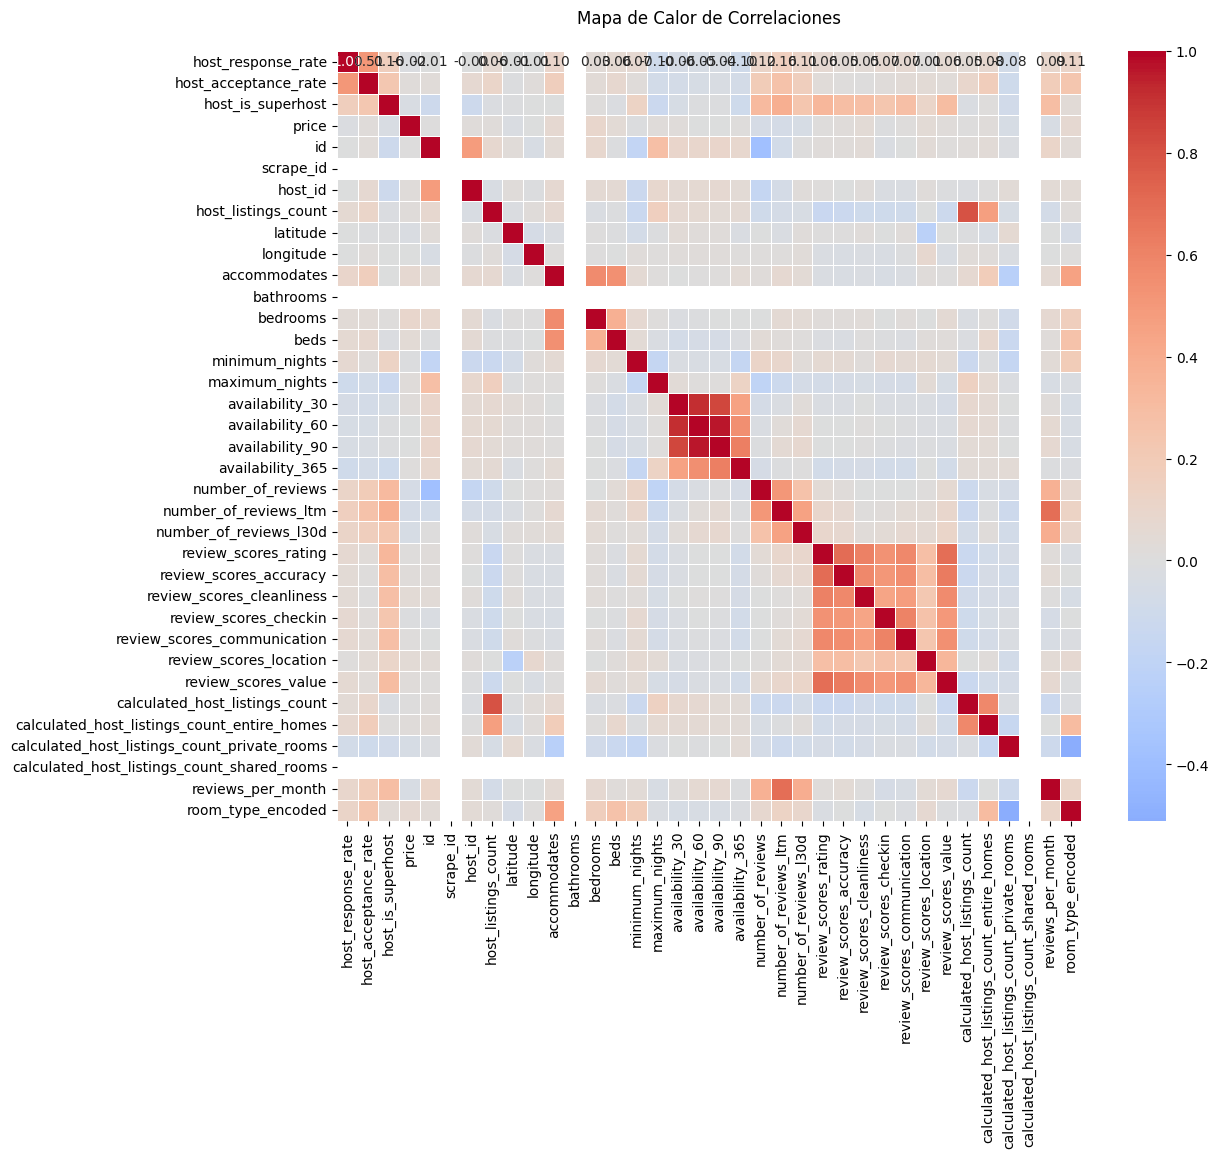

In [86]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0,
            linewidths=0.5)

plt.title("Mapa de Calor de Correlaciones", pad=20)
plt.show()

In [77]:
# 1. Modelo para host_id
Vars_Indep = df[['host_listings_count', 'number_of_reviews', 'calculated_host_listings_count']]
Var_Dep = df['host_id']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n1. Modelo para host_id:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


1. Modelo para host_id:
R²: 0.030763453852603595
Correlación: 0.17539513634249837


In [74]:
# 2. Modelo para host_acceptance_rate
Vars_Indep = df[['host_response_rate', 'host_is_superhost', 'number_of_reviews']]
Var_Dep = df['host_acceptance_rate']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n2. Modelo para host_acceptance_rate:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


2. Modelo para host_acceptance_rate:
R²: 0.29400881746191687
Correlación: 0.5422257993326368


In [75]:
# 3. Modelo para host_is_superhost
Vars_Indep = df[['host_response_rate', 'host_acceptance_rate', 'review_scores_rating']]
Var_Dep = df['host_is_superhost']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n3. Modelo para host_is_superhost:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


3. Modelo para host_is_superhost:
R²: 0.16033775772996783
Correlación: 0.4004219745842726


In [78]:
# 4. Modelo para host_listings_count
Vars_Indep = df[['availability_365', 'calculated_host_listings_count']]
Var_Dep = df['host_listings_count']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n4. Modelo para host_total_listings_count:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


4. Modelo para host_total_listings_count:
R²: 0.6423487389170832
Correlación: 0.8014666174689269


In [80]:
# 5. Modelo para room_type (asumiendo que ya está convertido a numérico)
Vars_Indep = df[['price', 'accommodates', 'bedrooms']]
Var_Dep = df['room_type_encoded']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n5. Modelo para room_type:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


5. Modelo para room_type:
R²: 0.2256041710342429
Correlación: 0.4749780742668475


In [81]:
# 6. Modelo para accommodates
Vars_Indep = df[['bedrooms', 'bathrooms', 'beds']]
Var_Dep = df['accommodates']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n6. Modelo para accommodates:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


6. Modelo para accommodates:
R²: 0.44487457530827623
Correlación: 0.6669891868001131


In [82]:
# 7. Modelo para bedrooms
Vars_Indep = df[['accommodates', 'bathrooms', 'price']]
Var_Dep = df['bedrooms']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n7. Modelo para bedrooms:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


7. Modelo para bedrooms:
R²: 0.32296141317186755
Correlación: 0.568296941019277


In [83]:
# 8. Modelo para price
Vars_Indep = df[['accommodates', 'bedrooms', 'review_scores_value', 'bathrooms']]
Var_Dep = df['price']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n8. Modelo para price:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


8. Modelo para price:
R²: 0.009848144825601923
Correlación: 0.09923781953268584


In [84]:
# 9. Modelo para review_scores_value
Vars_Indep = df[['review_scores_rating', 'review_scores_cleanliness', 'reviews_per_month']]
Var_Dep = df['review_scores_value']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n9. Modelo para review_scores_value:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


9. Modelo para review_scores_value:
R²: 0.5118813206734276
Correlación: 0.715458818293148


In [85]:
# 10. Modelo para reviews_per_month
Vars_Indep = df[['number_of_reviews', 'review_scores_value', 'host_acceptance_rate']]
Var_Dep = df['reviews_per_month']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)
print("\n10. Modelo para reviews_per_month:")
print("R²:", coef_Deter)
print("Correlación:", coef_Correl)


10. Modelo para reviews_per_month:
R²: 0.1515516877898786
Correlación: 0.389296400946475


se obtienen coeficientes mas altos que los del mapa de calor de la regresión simples